In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs
from cdbw.cdbw import CDbw

Automatically created module for IPython interactive environment


Estimated number of clusters: 3
Homogeneity: 0.860
Completeness: 0.700
V-measure: 0.772
Adjusted Rand Index: 0.779
Adjusted Mutual Information: 0.699
Silhouette Coefficient: 0.522
Calinski-Harabaz Coefficient: 669.883


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5330589484459825 0.43267058791765906 0.2836248849267077 0.06541493958915248
CDbw score (comb): 0.065
0.4342026256730193 0.3515835977593459 0.24794706133359465 0.03785123174155477
CDbw score (bind): 0.038
71.55302064082608 3.062967236967806 0.11928229096126675 26.1424505672762
CDbw score (sep): 26.142
0.6456161954416426 0.5035672024788302 0.5330863563096425 0.1733123137718309
CDbw score (filter) : 0.173


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

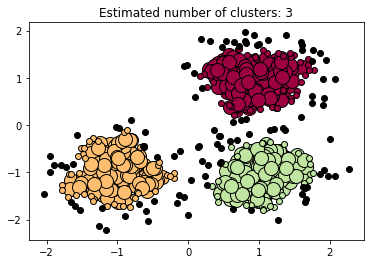

In [2]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("CDbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650
Calinski-Harabaz Coefficient: 2264.525


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.43896649261486054 0.35575650870178405 0.3321712578691305 0.05187358655124269
CDbw score: 0.052


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

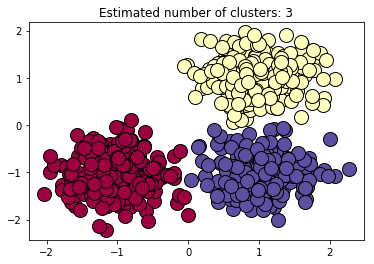

In [3]:
# #############################################################################
# Compute KMeans

kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 2
Homogeneity: 0.989
Completeness: 0.911
V-measure: 0.948
Adjusted Rand Index: 0.975
Adjusted Mutual Information: 0.911
Silhouette Coefficient: 0.222
Calinski-Harabaz Coefficient: 483.988


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.39478525765282513 0.34746716271753075 0.24805401543575786 0.0340267880758356
CDbw score (comb): 0.034
0.4778101658277297 0.4117560917342331 0.5700546010670644 0.11215325277109668
S_Dbw score (bind): 0.112
12.177489550277352 2.5313256551943693 0.12618679955665732 3.8897322881704204
CDbw score (sep): 3.890
0.48653760287736614 0.41761010665911985 0.5873689659351158 0.11934340048882615
CDbw score (filter) : 0.119


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

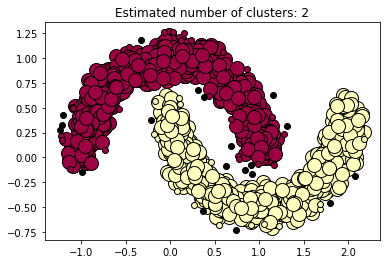

In [4]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_moons = make_moons(n_samples=n_samples, noise=.1)
X, labels_true = noisy_moons

db = DBSCAN(eps=0.1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("S_Dbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt


Estimated number of clusters: 2
Homogeneity: 0.204
Completeness: 0.204
V-measure: 0.204
Adjusted Rand Index: 0.269
Adjusted Mutual Information: 0.203
Silhouette Coefficient: 0.488
Calinski-Harabaz Coefficient: 2206.131


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5128786978811684 0.4313874349096564 0.05047857140293317 0.011168354943088621
CDbw score: 0.011


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

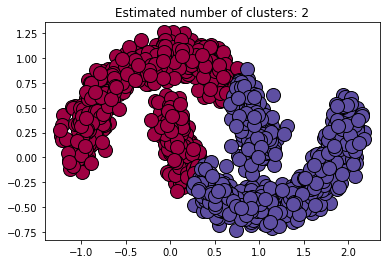

In [5]:
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.997
Completeness: 0.975
V-measure: 0.986
Adjusted Rand Index: 0.993
Adjusted Mutual Information: 0.975
Silhouette Coefficient: 0.388
Calinski-Harabaz Coefficient: 737.835


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.6514503377938794 0.5159921870578004 0.2160573559977922 0.0726262292979732
CDbw score (comb): 0.073
0.7933536249143236 0.5881295445140047 0.30420104904659856 0.14193859906285744
CDbw score (bind): 0.142
4.873812763403174 1.9035033779709185 0.17099916987737396 1.5864138577313482
CDbw score (sep): 1.586
0.808742564946084 0.5982374419753227 0.2641189890602938 0.12778607128031488
CDbw score (filter) : 0.128


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

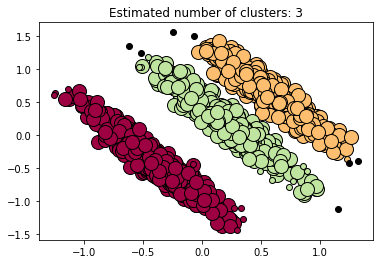

In [6]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============


centers = [[1, 1], [-2, -2], [3, 3]]
X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.4,
                            random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

db = DBSCAN(eps=0.14).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score (comb): %0.3f"
      % CDbw(X, labels, alg_noise='comb'))
print("CDbw score (bind): %0.3f"
      % CDbw(X, labels, alg_noise='bind'))
print("CDbw score (sep): %0.3f"
      % CDbw(X, labels, alg_noise='sep'))
print("CDbw score (filter) : %0.3f"
      % CDbw(X, labels, alg_noise='filter'))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt

Estimated number of clusters: 3
Homogeneity: 0.580
Completeness: 0.580
V-measure: 0.580
Adjusted Rand Index: 0.506
Adjusted Mutual Information: 0.580
Silhouette Coefficient: 0.432
Calinski-Harabaz Coefficient: 1526.447


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7506746644117348 0.5647581076831628 0.11263741023390908 0.047752585346980514
CDbw score: 0.048


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

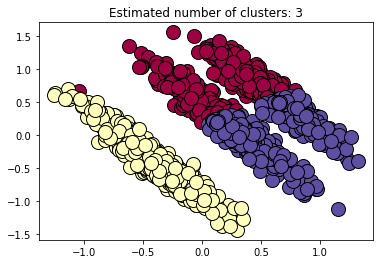

In [7]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
# #############################################################################
# Compute KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
print("Calinski-Harabaz Coefficient: %0.3f"
      % metrics.calinski_harabaz_score(X, labels))
print("CDbw score: %0.3f"
      % CDbw(X, labels))

# #############################################################################
# Plot result

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt